In [1]:
import sys
sys.path.append('../scripts')
import numpy as np
import pandas as pd
from preprocess import load_data,drop_column,find_columns_with_missing_value, find_outliers, find_and_replace_outliers_with_median, IQR_outlier, normalize_date,convert_money_tofloat
from plots import plot_boxplot, plot_histogram


In [2]:

data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')

/tmp/ipykernel_134584/358739379.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [5]:
drop_column(data, ['NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate'])

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [ ]:
data = normalize_date(data,'TransactionMonth')
data = normalize_date(data, 'VehicleIntroDate')

data['CapitalOutstanding'] = pd.to_numeric(data['CapitalOutstanding'].apply(convert_money_tofloat))

### Clearning missing data

In [6]:

data['MaritalStatus'] = data['MaritalStatus'].fillna('Not specified')
data['Gender'] = data['Gender'].fillna('Not specified')
data['Bank'] = data['Bank'].fillna('Not specified')
data['VehicleType'] = data['VehicleType'].fillna('Not specified')
data['WrittenOff'] = data['WrittenOff'].fillna('Not specified')
data['Rebuilt'] = data['Rebuilt'].fillna('Not specified')
data['Converted'] = data['Converted'].fillna('Not specified')
data['NewVehicle'] = data['NewVehicle'].fillna('Not specified')
data['AccountType'] = data['AccountType'].fillna('Not specified')
data['make'] = data['make'].fillna('Not specified')
data['Model'] = data['Model'].fillna('Not specified')

In [7]:
find_columns_with_missing_value(data)

columns above the threshold


['mmcode',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'bodytype',
 'NumberOfDoors',
 'VehicleIntroDate']

## Finding outliners

In [8]:
outliners = find_outliers(data)

Found 1961 outliers in column 'UnderwrittenCoverID'.
No outliers found in column 'PolicyID' using z-score threshold 3.
Found 5023 outliers in column 'IsVATRegistered'.
No outliers found in column 'PostalCode' using z-score threshold 3.
Found 54514 outliers in column 'mmcode'.
Found 7482 outliers in column 'RegistrationYear'.
Found 34262 outliers in column 'Cylinders'.
Found 5669 outliers in column 'cubiccapacity'.
Found 2725 outliers in column 'kilowatts'.
Found 29647 outliers in column 'NumberOfDoors'.
Found 51 outliers in column 'SumInsured'.
Found 743 outliers in column 'CalculatedPremiumPerTerm'.
Found 12470 outliers in column 'TotalPremium'.
Found 1312 outliers in column 'TotalClaims'.


In [9]:
data = find_and_replace_outliers_with_median(data, ['SumInsured'])

Processing columns: ['SumInsured']
Found 51 outliers in column 'SumInsured'.
Median value for 'SumInsured' (used for replacement): 7500.0
Outliers in column 'SumInsured' replaced with median.


KeyboardInterrupt: 

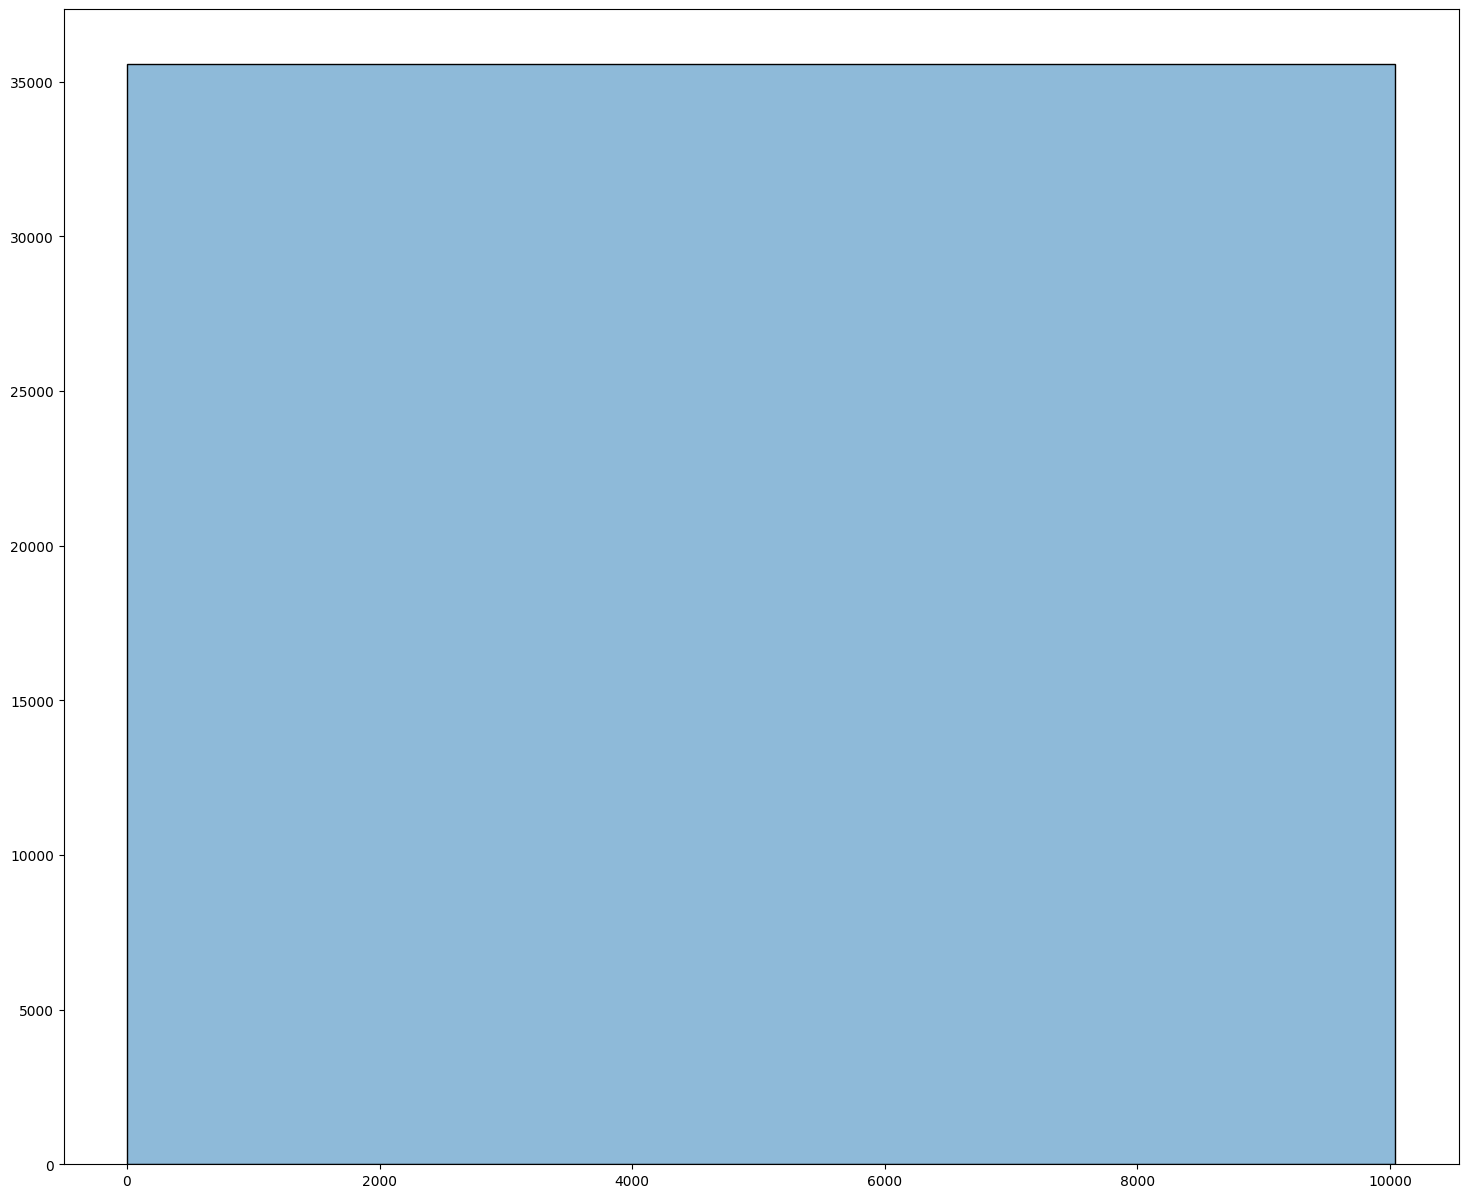

In [10]:
plot_histogram(data,[])